In [1]:
import pandas as pd
data=pd.read_csv("FAOLEX_All.csv")
print(data.keys())

Index(['Record Id', 'Record URL', 'Document URL', 'Title', 'Original title',
       'Date of original text', 'Last amended date', 'Available website',
       'Language of document', 'Country/Territory', 'Regional organizations',
       'Territorial subdivision', 'Type of text', 'Repealed', 'Abstract',
       'Primary subjects', 'Domain', 'Keywords'],
      dtype='object')


In [2]:
import nltk
keywords=list(data["Keywords"])
country=list(data["Country/Territory"])
i=0
# Split alle keywords op i en liste og ændrer nan til at være en str med Nan
for words in keywords:
    if type(words)!=str:
        #print("type= ",type(words)," Index = ", i)
        words="Nan"
    if type(country[i])!=str:
        country[i]="NaN"
    keywords[i]=words.split(";")
    i+=1



In [3]:
from nltk.stem import SnowballStemmer
from nltk.tokenize import word_tokenize
import numpy as np
stemmer = SnowballStemmer("english")
stemmed_words=[]
for i in range(len(keywords)):
    stemmed_words.append([stemmer.stem(word) for word in keywords[i]])



In [4]:
print(keywords[15])
print(stemmed_words[15])


['marine fisheries', ' traditional rights/customary rights', ' fishing authorization', ' allocation/quota', ' fishery management and conservation']
['marine fisheri', ' traditional rights/customary right', ' fishing author', ' allocation/quota', ' fishery management and conserv']


# Top2vec topic model

In [5]:
# Make a top2vec topic model
from top2vec import Top2Vec
i=0
for word in keywords:
    keywords[i]="".join(word)
    i+=1
model = Top2Vec(keywords,embedding_model="doc2vec")


C:\Users\Jacob pc\anaconda3\lib\site-packages\umap\distances.py:1063: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
C:\Users\Jacob pc\anaconda3\lib\site-packages\umap\distances.py:1071: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
C:\Users\Jacob pc\anaconda3\lib\site-packages\umap\distances.py:1086: NumbaDeprecationWarning: The 'nopyth

In [6]:
topic_sizes, topic_nums = model.get_topic_sizes()
topic_sizes

array([1467, 1304, 1266, ...,   20,   20,   19], dtype=int64)

In [7]:
model.get_num_topics()

1191

In [8]:
topic_words,word_scores,topic_nums = model.get_topics(5)

In [9]:
print(topic_words)

[['continental' 'territorial' 'shelf' 'sea' 'exclusive' 'eez' 'maritime'
  'economic' 'zone' 'high' 'seas' 'sovereignty' 'mesh' 'deep'
  'navigation' 'catch' 'transshipment' 'vessel' 'diadromous' 'allowable'
  'port' 'foreign' 'fishing' 'total' 'fisheries' 'bycatch' 'method'
  'marine' 'bed' 'harbour' 'fishery' 'landing' 'coastal' 'mammals'
  'charge' 'cartilaginous' 'migratory' 'unregulated' 'exploration'
  'unreported' 'fishes' 'commercial' 'state' 'mariculture' 'repopulation'
  'stock' 'artisanal' 'illegal' 'seasons' 'mining']
 ['sources' 'domestic' 'waste' 'solid' 'prevention' 'disposal' 'reuse'
  'recycling' 'movement' 'hazardous' 'plastic' 'effluent' 'substances'
  'discharge' 'polluter' 'pays' 'control' 'pollution' 'air' 'noise'
  'economy' 'circular' 'audit' 'environmental' 'principle' 'sewerage'
  'rehabilitation' 'industrial' 'loss' 'freshwater' 'emissions' 'surface'
  'non' 'transboundary' 'oil' 'charges' 'coal' 'radiation' 'cleaning'
  'water' 'packaging' 'groundwater' 'bio

In [10]:
# Find documents most similar to a specific topic
documents, document_scores, document_ids = model.search_documents_by_topic(topic_num=110, num_docs=10)
for doc, score, doc_id in zip(documents, document_scores, document_ids):
    print(f"Document: {doc_id}, Score: {score}")
    print("-----------")
    print(doc)
    print("-----------")
    print()

Document: 20984, Score: 0.9819120764732361
-----------
marine fisheries crustaceans seasons fishing area fishery management and conservation
-----------

Document: 86838, Score: 0.9805100560188293
-----------
marine fisheries crustaceans seasons fishery management and conservation
-----------

Document: 2956, Score: 0.9782544374465942
-----------
seasons crustaceans fishery management and conservation marine fisheries
-----------

Document: 30340, Score: 0.9772143959999084
-----------
fishery management and conservation crustaceans seasons marine fisheries
-----------

Document: 11974, Score: 0.9772082567214966
-----------
marine fisheries crustaceans seasons fishery management and conservation
-----------

Document: 14189, Score: 0.9763475656509399
-----------
marine fisheries crustaceans fishing area seasons fishery management and conservation
-----------

Document: 134608, Score: 0.9760066270828247
-----------
marine fisheries seasons crustaceans fishery management and conservation


In [11]:
# Check documents
data.iloc[85707]

Record Id                                                     LEX-FAOC103851
Record URL                 http://www.fao.org/faolex/results/details/en/c...
Document URL                   https://faolex.fao.org/docs/pdf/bi-103851.pdf
Title                      Resolución Nº 4/011 - Fíjase en 6.500 tonelada...
Original title                                                           NaN
Date of original text                                             28-06-2011
Last amended date                                                        NaN
Available website                                                        NaN
Language of document                                                 Spanish
Country/Territory                                         Argentina; Uruguay
Regional organizations                                                 CTMFM
Territorial subdivision                                                  NaN
Type of text                                                       Agreement

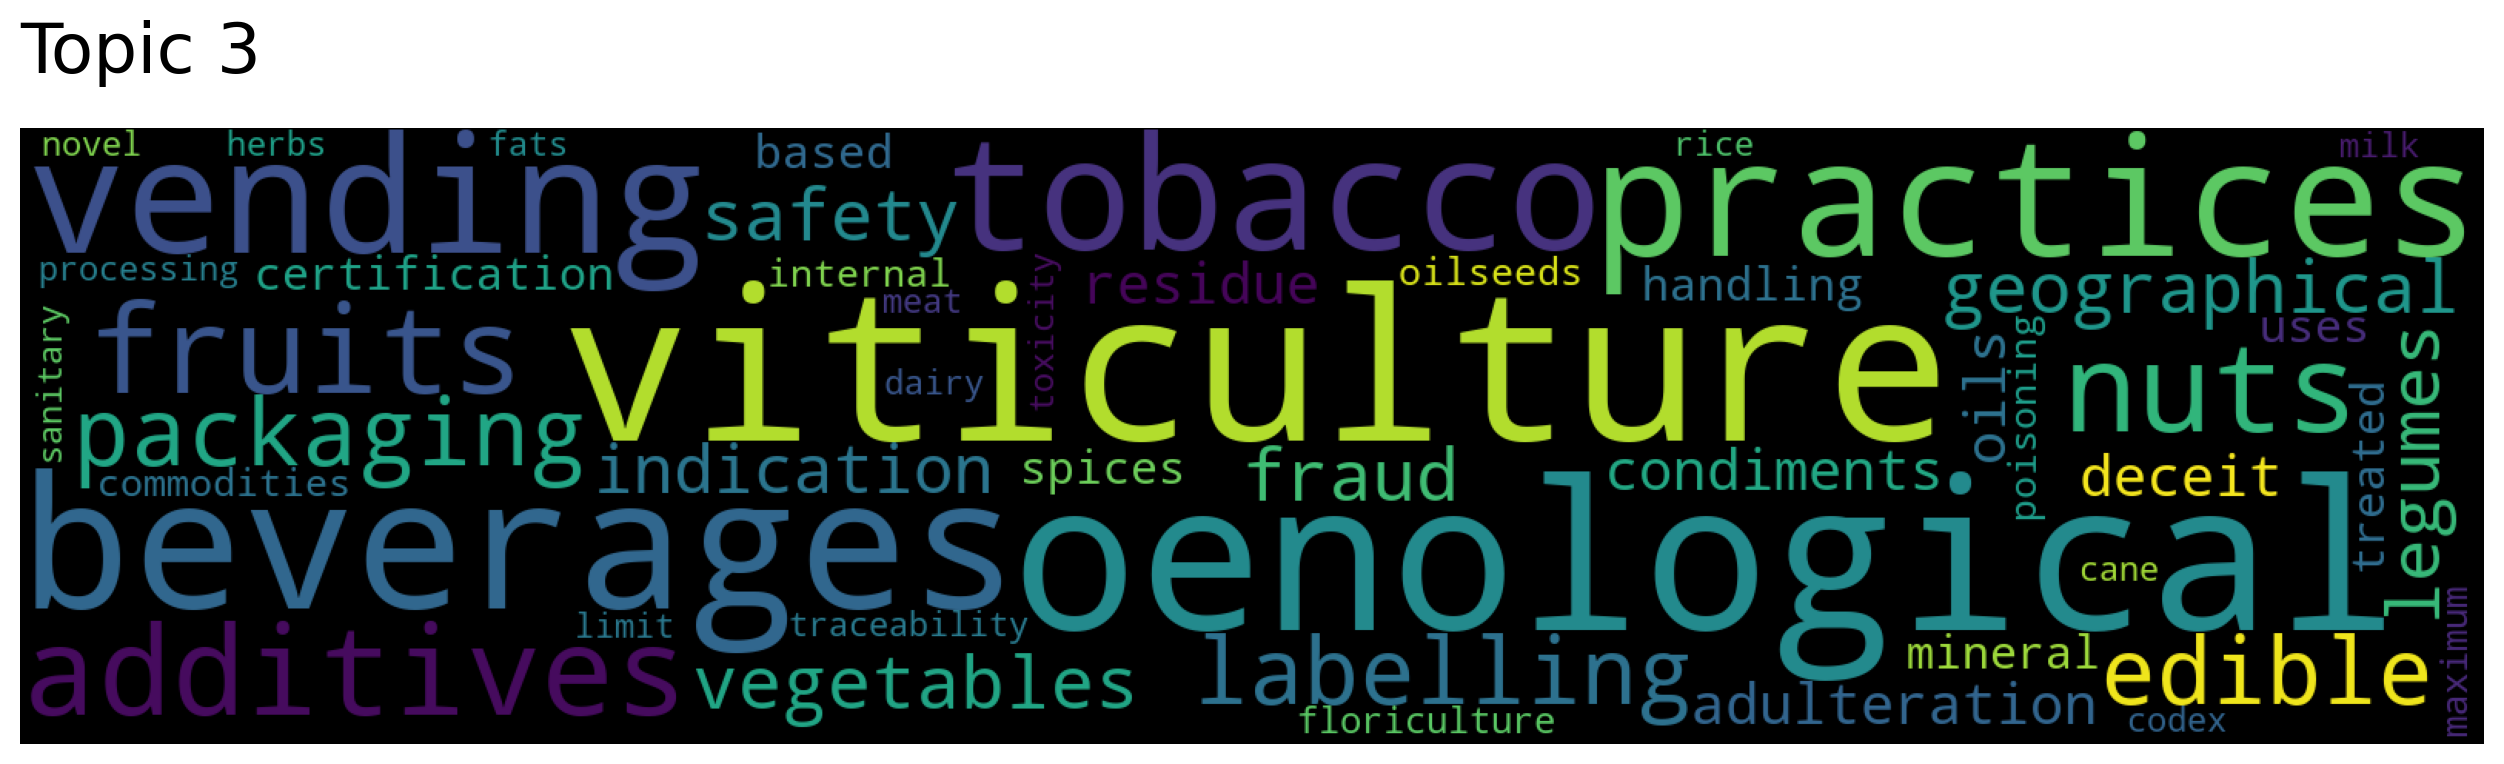

In [12]:
model.generate_topic_wordcloud(3)

In [13]:
# Look up topics corresponding to a keyword
topic_words, word_scores, topic_scores, topic_nums = model.search_topics(keywords=["waste"], num_topics=10)
print(topic_words)
print(topic_nums)
print(topic_scores)

[array(['polluter', 'pays', 'sources', 'domestic', 'prevention', 'waste',
       'solid', 'principle', 'disposal', 'recycling', 'reuse',
       'hazardous', 'movement', 'effluent', 'control', 'pollution',
       'substances', 'air', 'discharge', 'plastic', 'precautionary',
       'environmental', 'noise', 'emissions', 'audit', 'eia', 'charges',
       'rehabilitation', 'ozone', 'circular', 'economy', 'surface',
       'impact', 'industrial', 'assessment', 'healthy', 'water',
       'environment', 'freshwater', 'layer', 'damage', 'soil',
       'compensation', 'groundwater', 'clean', 'free', 'transboundary',
       'coal', 'liability', 'sewerage'], dtype='<U15'), array(['sources', 'domestic', 'solid', 'waste', 'prevention', 'disposal',
       'rehabilitation', 'reuse', 'effluent', 'recycling', 'discharge',
       'soil', 'control', 'hazardous', 'polluter', 'pays', 'pollution',
       'movement', 'industrial', 'environmental', 'air', 'improvement',
       'audit', 'saltwater', 'substance

## Country co-occurence

- For hver tekst, find tilhørende topic --> noter landet til denne topic

In [14]:
# Compute unqie countries --> i.e. remove agreement "countries" 
country_new=[]
for coun in country:
    if len(coun.split(";"))>=2:
        for c in coun.split("; "):
            country_new.append(c)
    else:
        country_new.append(coun)

In [15]:
# Make country dict --> key: country, value: country index
countries = {}
i=0
for country_x in (list(set(country_new))):
    countries[country_x]=i
    i+=1

In [22]:
# Compute country co-occurence matrix
topic_sizes, topic_nums = model.get_topic_sizes()

country_topic_matrix = np.zeros((len(set(country_new)),len(topic_nums)))

for num in topic_nums:
    # For each topic get the corresponding documents
    documents, document_scores, document_ids = model.search_documents_by_topic(topic_num=num,num_docs=topic_sizes[num])
    for id in document_ids:
        # Find the documents' countries and add it to the co-occurence matrix
        if len(country[id].split(";"))>=2:
            for c in country[id].split("; "):
                 country_topic_matrix[countries[c],num] +=1
        else:
            country_topic_matrix[countries[country[id]],num] +=1


In [23]:
#Standardisering
def get_swap_dict(d):
    return {v: k for k, v in d.items()}

countries_swap = get_swap_dict(countries)
for i in range(len(countries)):
    country_topic_matrix[i,:]=country_topic_matrix[i,:]/country_new.count(countries_swap[i])

In [38]:
country_co_ocurrence = np.matmul(country_topic_matrix,country_topic_matrix.T)
np.shape(country_co_ocurrence)




KeyboardInterrupt: 

In [25]:
topic_sizes, topic_nums = model.get_topic_sizes()
documents, document_scores, document_ids = model.search_documents_by_topic(topic_num=3,num_docs=topic_sizes[3])
for id in document_ids:
    print(country[id])

print(document_ids[13])


European Union
Chile
Mexico
El Salvador
El Salvador
European Union
Slovenia
Uruguay
Poland
European Union
Latvia
Russian Federation
Greece
Republic of Moldova
Russian Federation
Lithuania
Germany
Portugal
Russian Federation
Greece
Peru
European Union
Mexico
Latvia
Cyprus
Argentina
European Union
Greece
Argentina
European Union
Cyprus
Ukraine
Austria
Argentina
Russian Federation
Portugal
Russian Federation
Poland
Germany
Germany
Germany
Austria
Argentina
European Union
Argentina
France
Ukraine
Switzerland
Russian Federation
France
Argentina
Argentina
Italy
Argentina
Germany
Russian Federation
Argentina
Argentina
Argentina
Argentina
Argentina
Luxembourg
European Union
Germany
Belarus
Croatia
Greece
Germany
Argentina
Croatia
Argentina
Russian Federation
France
Italy
Germany
San Marino
Kyrgyzstan
Ukraine
Argentina
Kazakhstan
Italy
Russian Federation
Uruguay
Morocco
Republic of Moldova
Argentina
Argentina
Uzbekistan
Austria
Argentina
Russian Federation
Russian Federation
Belgium
Russian Fed

# Forskellige topic reduction

In [20]:
topic_mapping = model.hierarchical_topic_reduction(num_topics=200)

KeyboardInterrupt: 

In [ ]:
print(model.topic_words_reduced)

In [ ]:
model.topic_words_reduced[4]

In [ ]:
topic_words,word_scores,topic_nums = model.get_topics(10)
topic_words

# Data analyse

In [ ]:
print(keywords[15])
print(len(keywords[15]))

In [ ]:
# Tæl hvor mange der er repealed inden for et dato interval
dates=data["Date of original text"]
repealed=data["Repealed"]
antal=0
for i in range(1800,2022):
    c=dates==str(i)
    d=repealed=="Y"
    antal+=sum(c*d)
print(antal)


In [ ]:
#Append country to keywords -- outdated
#i=0

#for words in keywords:
 #   keywords[i]=words + [" "+country[i]]
  #  i+=1

In [ ]:
# Find number of extinct domains
a= list(set(data["Domain"]))
i=0
for words in a:
    if type(words)!=str:
        #print("type= ",type(words)," Index = ", i)
        words="Nan"
    a[i]=words.split(";")

    i+=1

In [37]:
# print different domains
a=sum(a,[])
i=0
for word in a:
        word=word.strip()
        a[i]=word
        i+=1

print(set(a))



NameError: name 'a' is not defined

In [ ]:
# Count number documents in a language
languages=list(data["Language of document"])
print(languages.count("English"))

In [ ]:
set(country_new)

- Cluster topics
- Dendogram

In [ ]:


# Graph representation


In [26]:
# swap dict

def get_swap_dict(d):
    return {v: k for k, v in d.items()}

countries_swap = get_swap_dict(countries)

print(countries_swap)


{0: 'Bonaire, Sint Eustatius and Saba (Netherlands)', 1: 'Austria', 2: 'Antigua and Barbuda', 3: 'Falkland Islands (Malvinas)', 4: 'Belgium', 5: 'Japan', 6: 'Saint Lucia', 7: 'Sri Lanka', 8: 'Northern Mariana Islands (USA)', 9: 'Honduras', 10: 'Netherlands Antilles (Netherlands)', 11: 'Thailand', 12: 'Glorioso Island (France)', 13: 'United States Virgin Islands', 14: 'Luxembourg', 15: 'Burundi', 16: 'Cayman Islands (UK)', 17: 'Grenada', 18: 'South Sudan', 19: 'France', 20: 'Brazil', 21: 'Ethiopia', 22: 'Qatar', 23: 'Tuvalu', 24: 'Guam (USA)', 25: 'Jammu and Kashmir (India)', 26: 'Central African Republic', 27: 'Dominica', 28: 'Somalia', 29: 'Oman', 30: 'New Zealand', 31: 'Seychelles', 32: 'Paraguay', 33: 'Faroe Islands (Denmark)', 34: 'Marshall Islands', 35: 'Philippines', 36: 'Ireland', 37: 'Cook Islands', 38: 'Singapore', 39: 'Kiribati', 40: 'Lebanon', 41: 'Eritrea', 42: 'Pitcairn (UK)', 43: 'Cambodia', 44: 'Albania', 45: 'Mozambique', 46: 'Gambia', 47: 'Equatorial Guinea', 48: 'NaN'

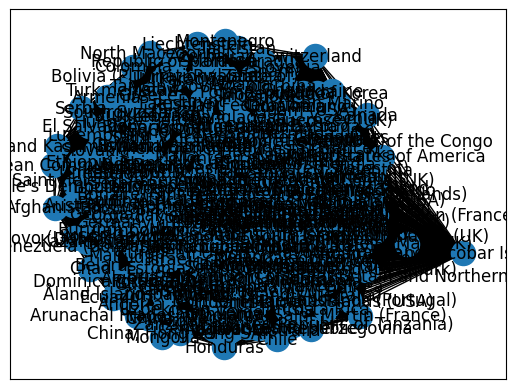

In [30]:

from networkx.algorithms.community import girvan_newman
import networkx as nx
import itertools
import matplotlib.pyplot as plt

G = nx.Graph()

size = country_co_ocurrence.shape[0]


G.add_nodes_from(range(size))

for i in range(size):
        for j in range(i+1, size):
            if country_co_ocurrence[i, j] != 0.0:
            #if country_co_ocurrence[i, j] > 0.005:
                G.add_edge(i, j, weight=country_co_ocurrence[i, j])


nx.draw_networkx(G, labels=countries_swap,with_labels=True)
#nx.draw_spring(G, labels=countries_swap,with_labels=True)




In [40]:
from networkx import edge_betweenness_centrality as betweenness

def most_central_edge(G):
    centrality = betweenness(G, weight="weight")
    return max(centrality, key=centrality.get)

most_central_edge(G)

(10, 162)

In [ ]:

NUM_ITERATIONS = 5
for i in range(NUM_ITERATIONS):
    edge_betweenness = nx.edge_betweenness_centrality(G).items()
    edge_to_delete = sorted(edge_betweenness, key=lambda pair: -pair[1])[0][0]

    G.remove_edge(*edge_to_delete)
    print('Step %s\nEdge %s Deleted'%(i, edge_to_delete))
    nx.draw_networkx(G, labels=countries_swap,with_labels=True)



In [ ]:
from networkx.algorithms.community import asyn_fluidc

k = 20


comp = girvan_newman(G)
#comp = asyn_fluidc(G,k=15, max_iter=100, seed=None)
for communities in itertools.islice(comp, k):
    print(tuple(sorted(c) for c in communities))

#nx.draw_networkx(comp, with_labels=True)

communities = list(nx.community.girvan_newman(G))

print(communities)

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

communities = list(nx.community.girvan_newman(G))
#communities = nx.community.girvan_newman(G)
k = 5

# Modularity -> measures the strength of division of a network into modules
modularity_df = pd.DataFrame(
    [
        [k + 1, nx.community.modularity(G, communities[k])]
        for k in range(len(communities))
    ],
    columns=["k", "modularity"],
)


# function to create node colour list
def create_community_node_colors(graph, communities):
    number_of_colors = len(communities[0])
    colors = ["#D4FCB1", "#CDC5FC", "#FFC2C4", "#F2D140", "#BCC6C8"][:number_of_colors]
    node_colors = []
    for node in graph:
        current_community_index = 0
        for community in communities:
            if node in community:
                node_colors.append(colors[current_community_index])
                break
            current_community_index += 1
    return node_colors


In [ ]:
# function to plot graph with node colouring based on communities
def visualize_communities(graph, communities, i):
    node_colors = create_community_node_colors(graph, communities)
    modularity = round(nx.community.modularity(graph, communities), 6)
    title = f"Community Visualization of {len(communities)} communities with modularity of {modularity}"
    pos = nx.spring_layout(graph, k=0.3, iterations=50, seed=2)
    plt.subplot(3, 1, i)
    plt.title(title)
    nx.draw(
        graph,
        pos=pos,
        node_size=1000,
        node_color=node_colors,
        with_labels=True,
        font_size=20,
        font_color="black",
    )


fig, ax = plt.subplots(3, figsize=(15, 20))

# Plot graph with colouring based on communities
visualize_communities(G, communities[0], 1)
visualize_communities(G, communities[3], 2)

# Plot change in modularity as the important edges are removed
modularity_df.plot.bar(
    x="k",
    ax=ax[2],
    color="#F2D140",
    title="Modularity Trend for Girvan-Newman Community Detection",
)
plt.show()

